### **Modeling the Links in a Robot**

Packages used:
<span style="color:black; background-color:yellow"> LinearAlgebra, QuadGK, Plots, LaTeXStrings </span>

In [1]:
using LinearAlgebra, QuadGK, Plots, LaTeXStrings
include("src\\Center_of_Mass_library.jl")

center_of_mass_symbol (generic function with 1 method)

In [2]:
# Given data
x_positions = [2, 4, 6, 8, 10]
masses = [2, 3, 4, 3, 2]

# Total mass (M_T)
@show M_T = sum(masses)

# Total moment (totalMomentx)
@show totalMomentx = sum(masses .* x_positions)

# Center of mass (x_c)
@show x_c = totalMomentx / M_T


M_T = sum(masses) = 14
totalMomentx = sum(masses .* x_positions) = 84
x_c = totalMomentx / M_T = 6.0


6.0

In [4]:
x_positions = [2, 4, 6, 8, 10]
masses = [2, 3, 4, 3, 200]
@show M_T = sum(masses)
@show totalMomentx = sum(masses.*x_positions)
@show x_c = totalMomentx / M_T;

M_T = sum(masses) = 212
totalMomentx = sum(masses .* x_positions) = 2064
x_c = totalMomentx / M_T = 9.735849056603774


**Key function: ComputeCoM**

- `areaIntegrand(x)` = $f(x) - g(x)$  
- `MxIntegrand(x)` = $x\ * $ `areaIntegrand(x)`  
- `MyIntegrand(x)` = $0.5*(f(x)^2 - g(x)^2)$  


In [ ]:
function f(x)
    # Basic Link
    # Origin is placed at left end of the link
    if x < 5
        # Left end semicircle: (x - r)^2 + y^2 = r^2
        y = sqrt(abs(5^2 - (x - 5)^2))
    elseif x < 55
        y = 5
    else
        # Right end semicircle: (r + distance_between_joints - x)^2 + y^2 = r^2
        y = sqrt(abs(5^2 - (5 + 50 - x)^2))
    end
    return y    
end

g(x) = -f(x)

xmin = 0.0
xmax = 60.0

(xc, yc) = computeCoM(f, g, xmin, xmax)


(30.000000027228815, 0.0)

### Hip

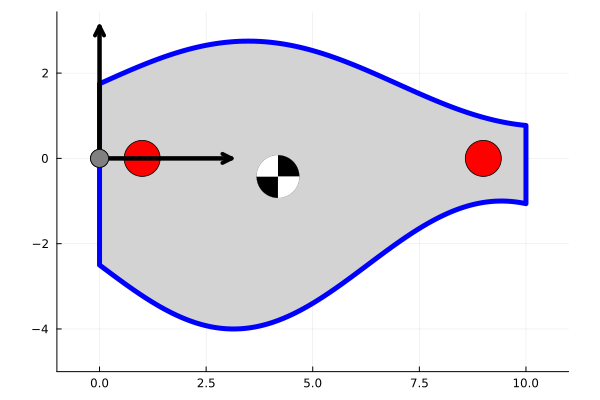

In [10]:
# Bounding functions having sinusoidal waves
f(x) = sin(0.45x) + 1.75
g(x) = -1.5sin(0.50x) - 2.5
L = 10.0
joint_offset = 1.0

xmin = 0.0
xmax = L

# Plot the custom robot link
F = plot_custom_robot_link(f, g, L, joint_offset, true)

# Compute and plot the center of mass symbol
(xc, yc) = computeCoM(f, g, xmin, xmax)
center_of_mass_symbol((xc, yc), 0.5, 0.2)
# png(F.plot, "CustomRobotLinkHipWithCoMSymbol")
display(F.plot)


### Saw

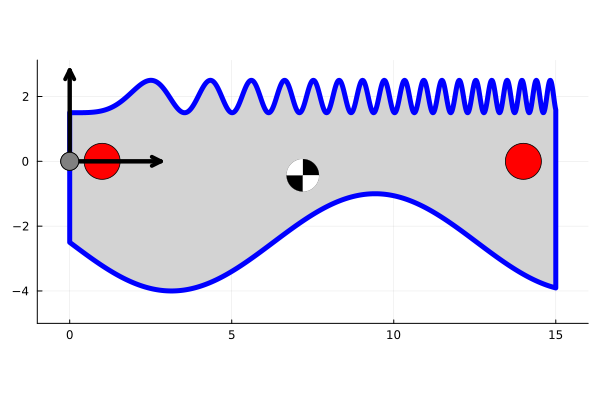

In [11]:
# Define bounding functions with more complex wave shapes
f(x) = sin(0.25 * x^2)^2 + 1.5
g(x) = -1.5 * sin(0.50 * x) - 2.5

L = 15.0
joint_offset = 1.0

xmin = 0.0
xmax = L

# Generate the plot
F = plot_custom_robot_link(f, g, L, joint_offset, true)

# Compute center of mass
(xc, yc) = computeCoM(f, g, xmin, xmax)

# Optional: plot and save with CoM symbol
center_of_mass_symbol((xc, yc), 0.5, 0.2)
# png(F.plot, "CustomRobotLinkCrazyWithCoMSymbol")
display(F.plot)